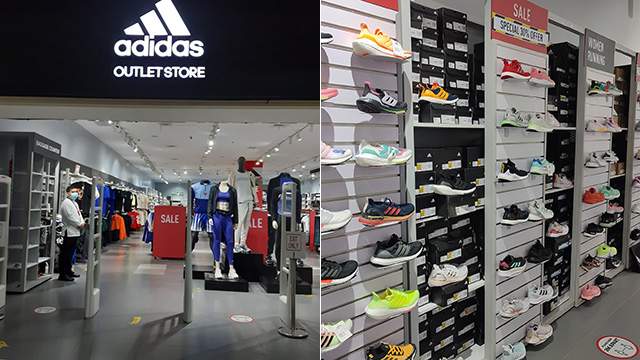

**DATA DESCRIPTION**
>
The data set was gotten from Kaggle and can be accessed using this [link](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/code). It is a collection of data that includes information on the sales of Adidas products. This dataset includes details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information. the dataset consists of 9652 rows and 12 columns.

**BUSINESS QUESTIONS**

What is the breakdown of sales by retailers, and how does it vary across different retailers?
How does the total profit of retailers compare and vary across different retailers?
1. What is the breakdown of sales by Product?
2. What is the top sales method?
3. What is the average price of products per unit?
4. Are there macro trends in sales?



In [38]:
import os

In [39]:
#import the packages

import pandas as pd

#math
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#dimension increasing
from sklearn.preprocessing import PolynomialFeatures


# **Loading the dataset**

In [40]:
adidas = pd.read_excel("Adidas Sales (2020-2021).xlsx")
adidas.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000.0,30000.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000.0,15000.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000.0,14000.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250.0,13387.5,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,54000.0,16200.0,In-store


In [41]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9646 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 904.6+ KB


In [42]:
adidas.drop_duplicates(inplace = True)

In [43]:
#clean all the special character in this dataset

spec_chars = ["!",'"',"#","%","&","*","(",")",
              "'","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
   adidas['Product'] = adidas['Product'].str.replace(char, ' ')



<ipython-input-43-bc9919a5f274>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adidas['Product'] = adidas['Product'].str.replace(char, ' ')


In [44]:
adidas['Product']

0           Men s Street Footwear
1         Men s Athletic Footwear
2         Women s Street Footwear
3       Women s Athletic Footwear
4                   Men s Apparel
                  ...            
9643                Men s Apparel
9644              Women s Apparel
9645        Men s Street Footwear
9646      Men s Athletic Footwear
9647      Women s Street Footwear
Name: Product, Length: 9648, dtype: object

In [45]:
adidas['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

In [46]:
# Let's us check the null value

adidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [47]:
#sseeing there is only 2 missing value, we'll just drop it from the dataset
df = adidas.dropna()

Will add date and month columns from invoice date for better analysis

In [48]:
df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
df['Month']=pd.to_datetime(df['Invoice Date']).dt.strftime('%B')
df['Invoice Date']=pd.to_datetime(df['Invoice Date']).dt.strftime('%Y-%m-%d')
df[['Price per Unit','Units Sold','Total Sales','Operating Profit']]=df[['Price per Unit','Units Sold','Total Sales','Operating Profit']].astype(float)

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9646 non-null   object 
 1   Retailer ID       9646 non-null   int64  
 2   Invoice Date      9646 non-null   object 
 3   Region            9646 non-null   object 
 4   State             9646 non-null   object 
 5   City              9646 non-null   object 
 6   Product           9646 non-null   object 
 7   Price per Unit    9646 non-null   float64
 8   Units Sold        9646 non-null   float64
 9   Total Sales       9646 non-null   float64
 10  Operating Profit  9646 non-null   float64
 11  Sales Method      9646 non-null   object 
 12  Year              9646 non-null   int64  
 13  Month             9646 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


<ipython-input-48-a62c1bccf93b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
<ipython-input-48-a62c1bccf93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df['Invoice Date']).dt.strftime('%B')
<ipython-input-48-a62c1bccf93b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men s Street Footwear,50.0,1200.0,60000.0,30000.0,In-store,2020,January
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men s Athletic Footwear,50.0,1000.0,50000.0,15000.0,In-store,2020,January
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women s Street Footwear,40.0,1000.0,40000.0,14000.0,In-store,2020,January
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women s Athletic Footwear,45.0,850.0,38250.0,13387.5,In-store,2020,January
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men s Apparel,60.0,900.0,54000.0,16200.0,In-store,2020,January


In [37]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Year
count,9.646000e+03,9646.000000,9646.000000,9646.000000,9646.000000,9646.0
mean,1.173846e+06,45.215633,256.843355,9321.917116,3441.030079,1970.0
std,2.636170e+04,14.706055,214.174812,14186.311316,5418.465454,0.0
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,1970.0
25%,1.185732e+06,35.000000,106.000000,425.150000,192.169750,1970.0
50%,1.185732e+06,45.000000,176.000000,957.600000,436.950000,1970.0
75%,1.185732e+06,55.000000,350.000000,15000.000000,5200.000000,1970.0
max,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000,1970.0


Viz all the feature column

In [49]:
categorical_features = ["Retailer","Region", "Product", "Sales Method", "Year", "Month"]

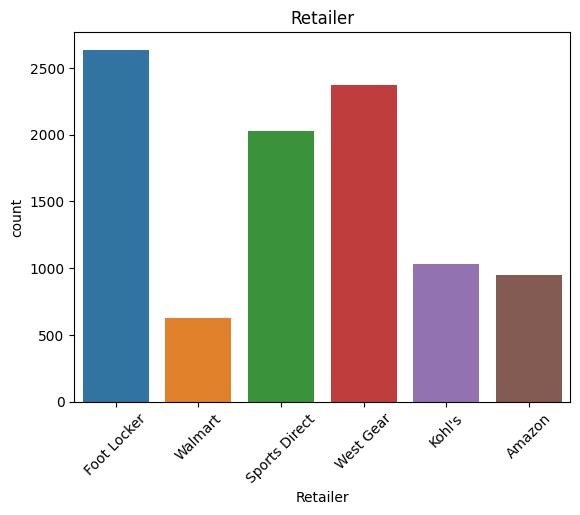

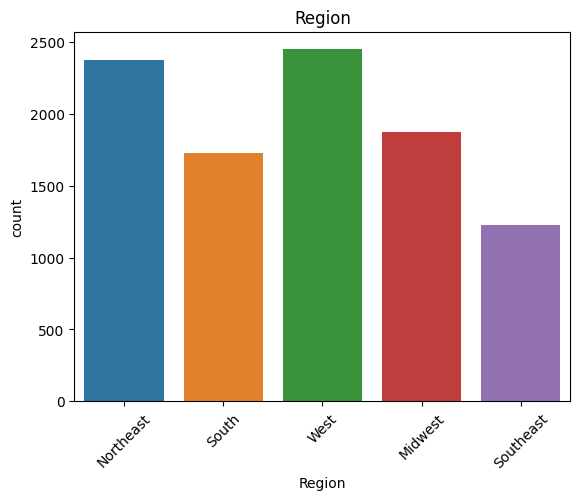

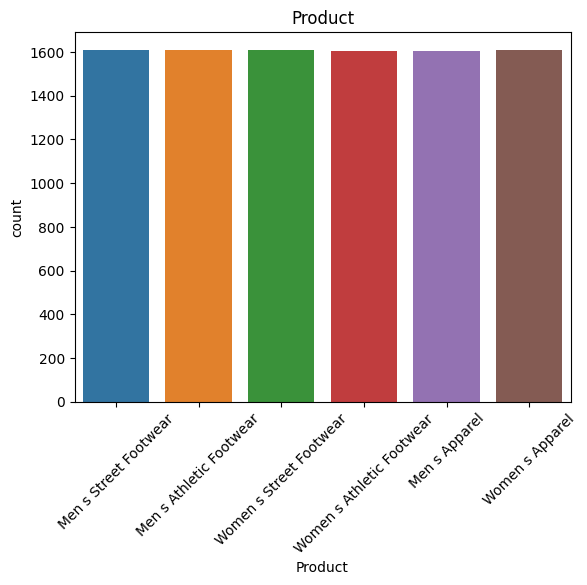

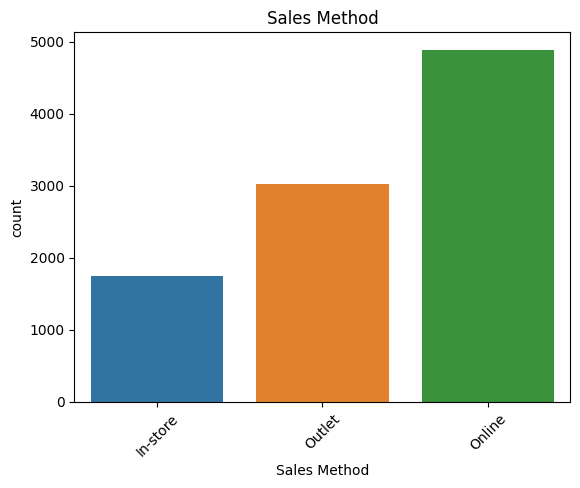

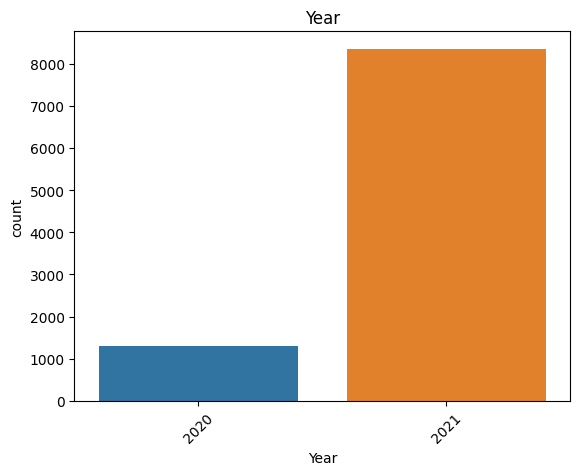

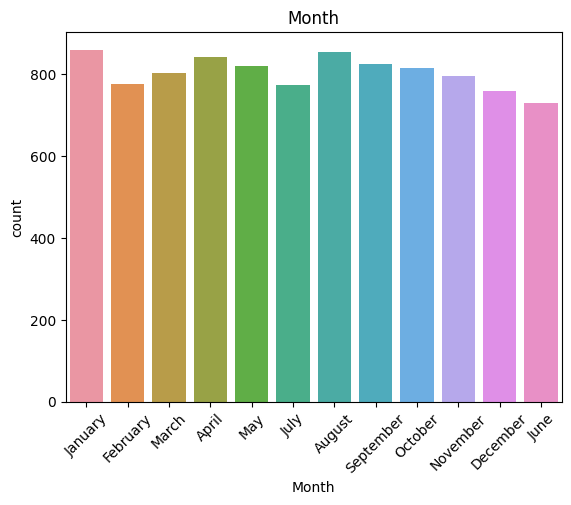

In [50]:
#categoricals
for c in categorical_features :
    sns.countplot(data=df, x = df[c])
    plt.xticks(rotation=45)
    plt.title(f"{c}")
    plt.show()



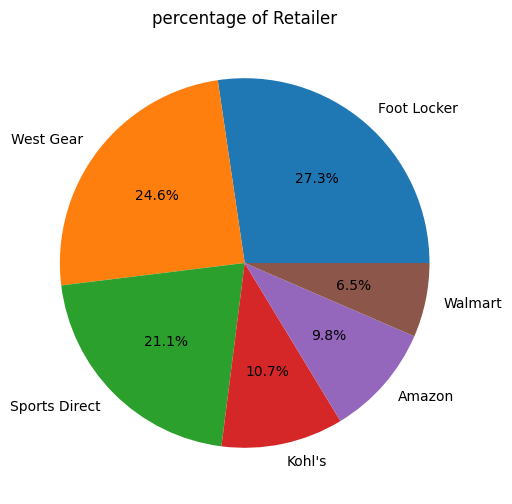

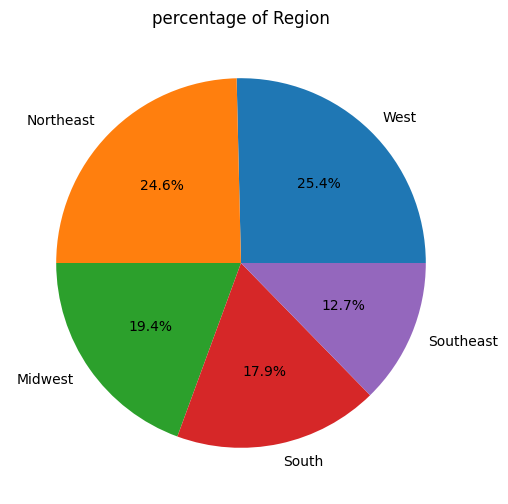

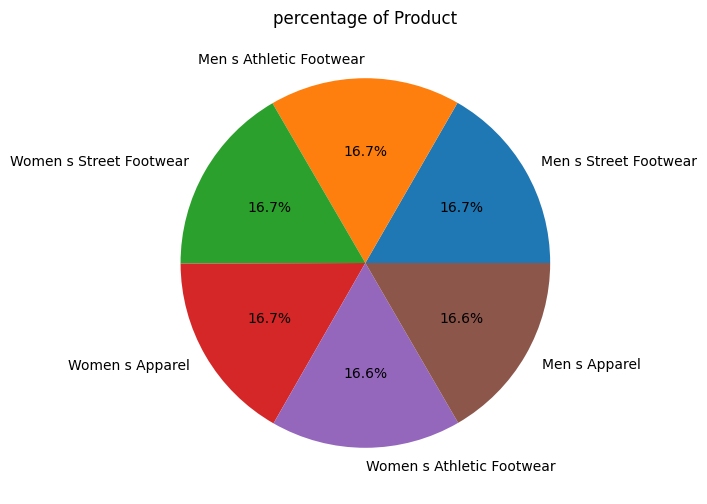

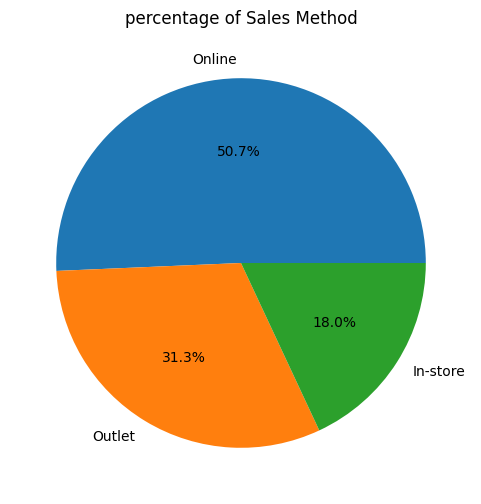

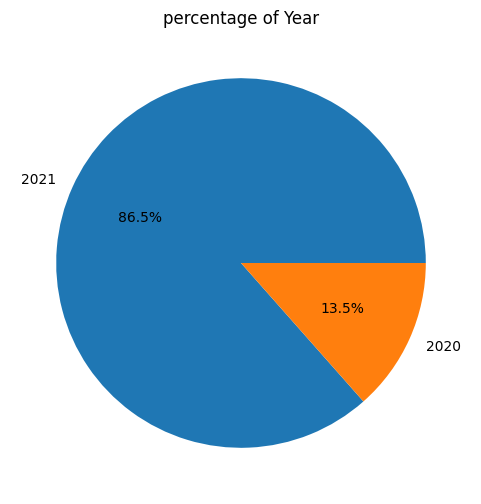

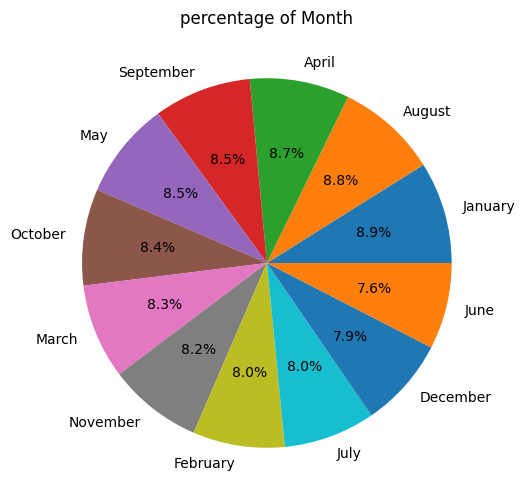

In [52]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

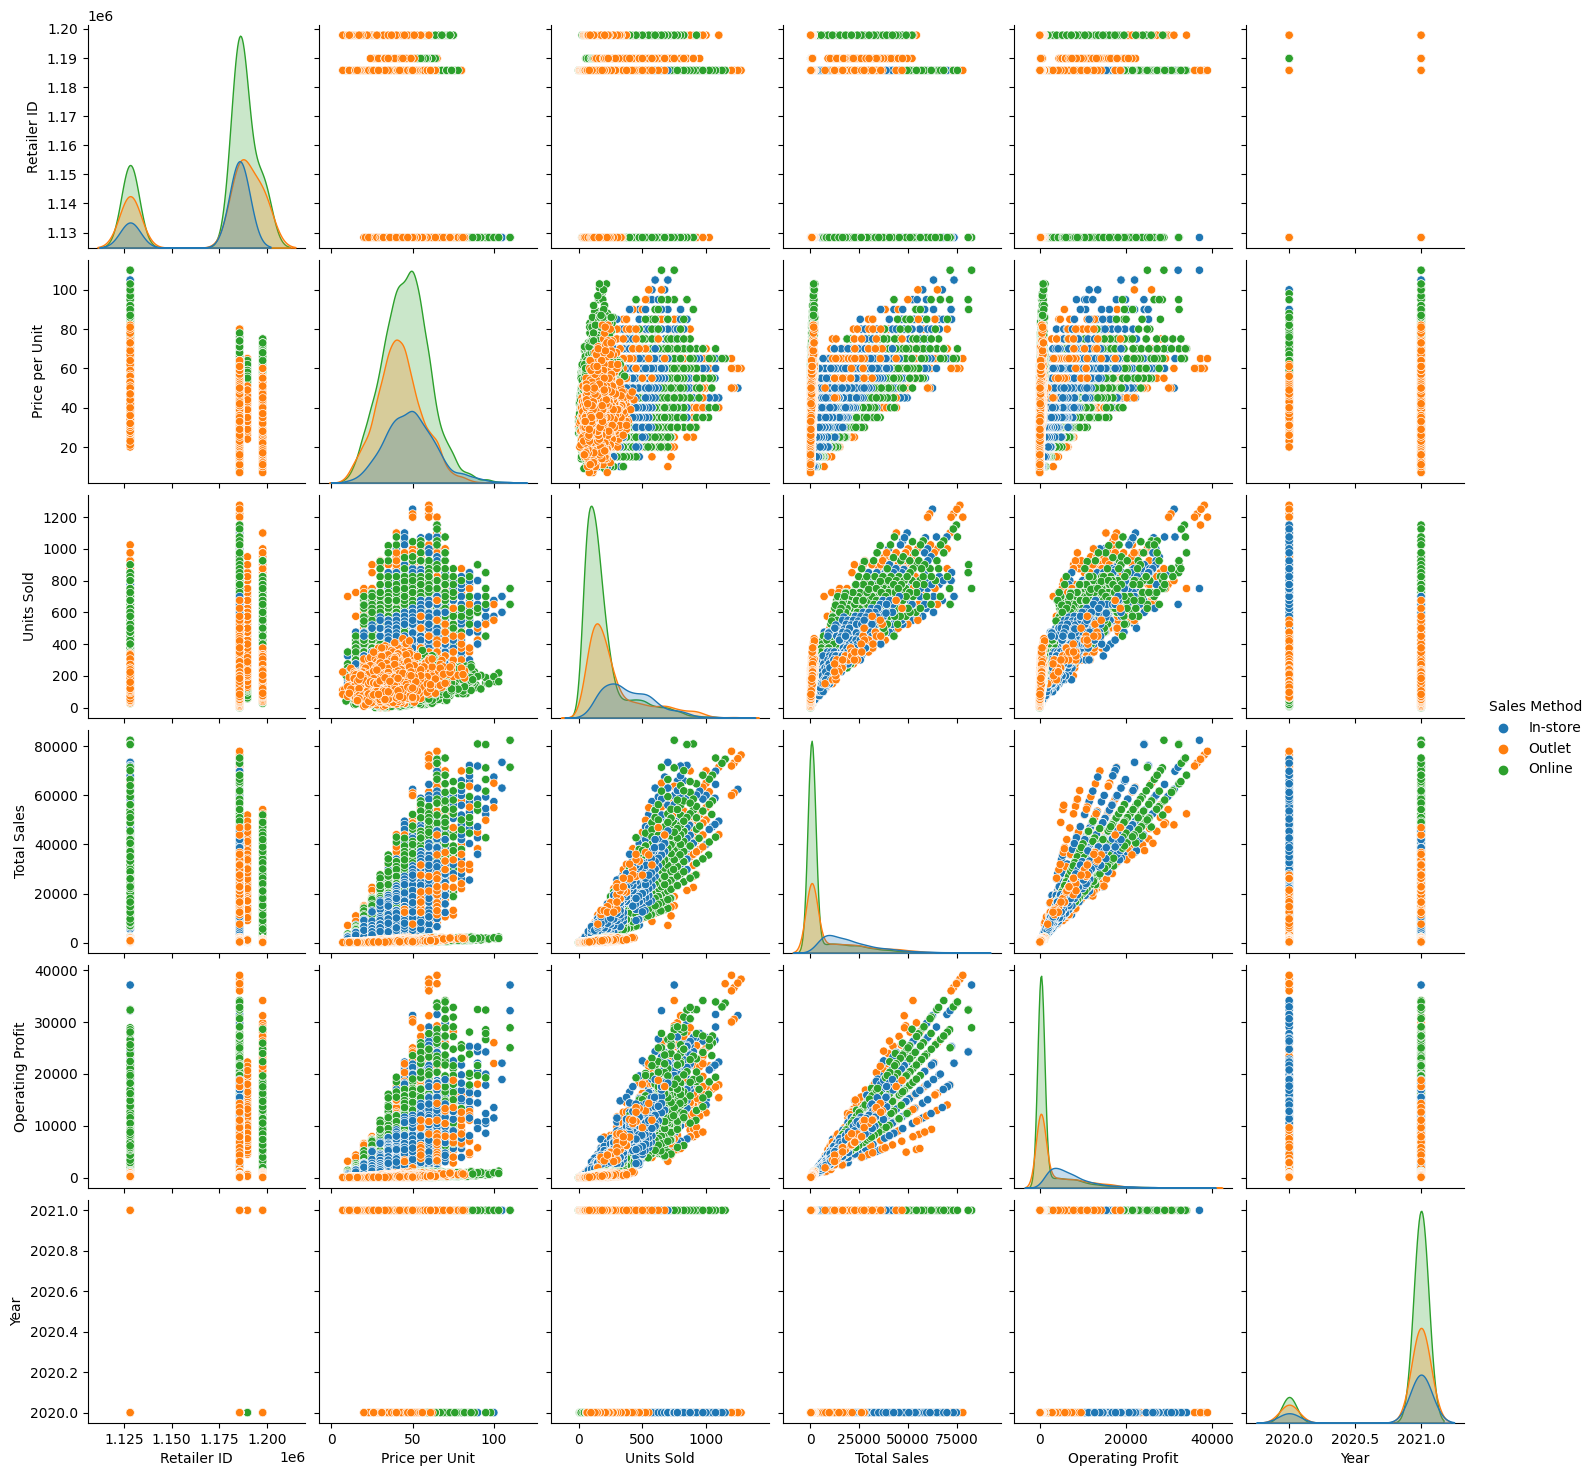

In [53]:
sns.pairplot(df, hue='Sales Method')

<ipython-input-54-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

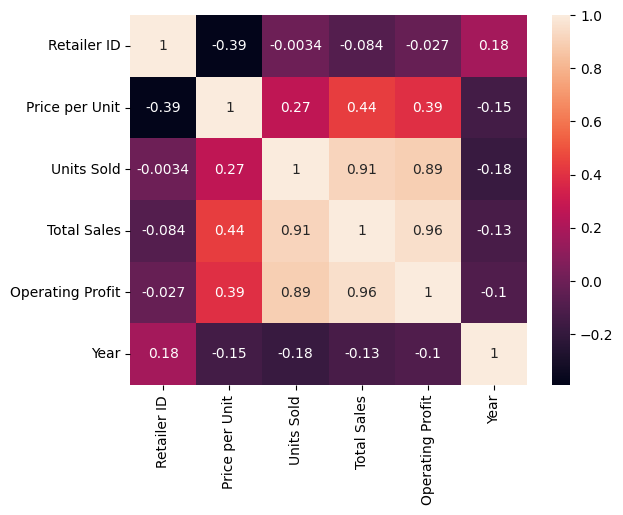

In [54]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Total sales  vs. retailer')

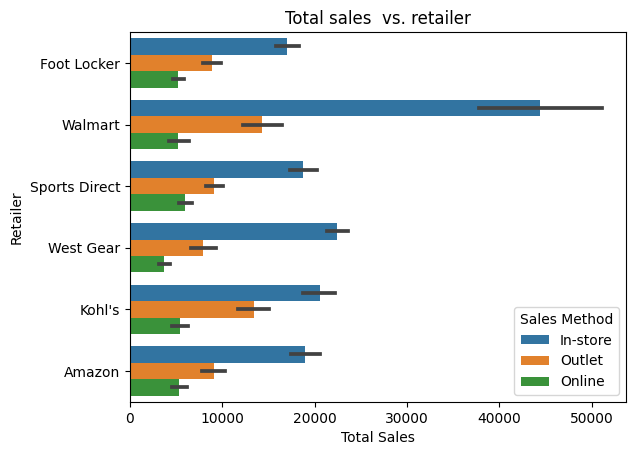

In [55]:
# using sequencial color for sales method scheme
sns.barplot(x='Total Sales', y='Retailer', hue='Sales Method', data=df)
plt.title('Total sales  vs. retailer')

Text(0.5, 1.0, 'Total sales  vs. Product')

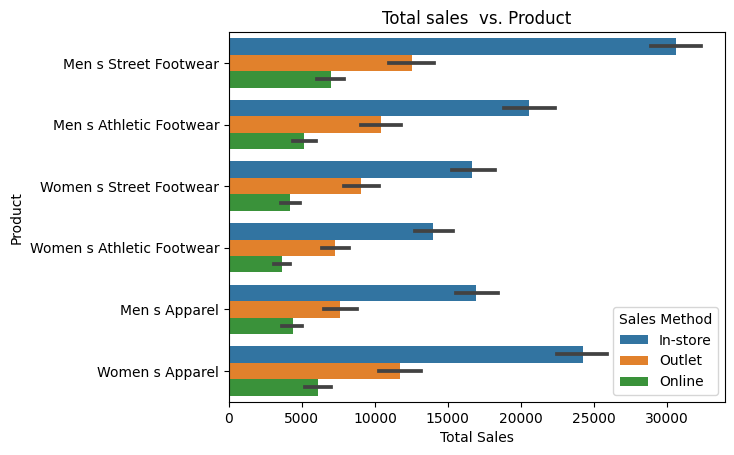

In [56]:
# using sequencial color for sales method scheme
sns.barplot(x='Total Sales', y='Product', hue='Sales Method', data=df)
plt.title('Total sales  vs. Product')

Text(0.5, 1.0, 'Total sales  vs. sales method')

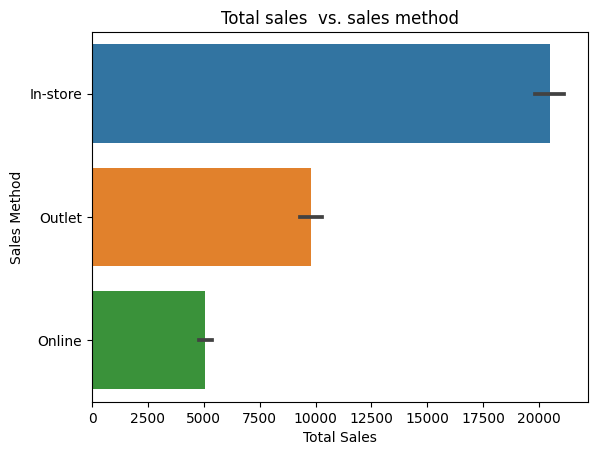

In [57]:
# using sequencial color for sales method scheme
sns.barplot(x='Total Sales', y='Sales Method',  data=df)
plt.title('Total sales  vs. sales method')

Text(0.5, 1.0, 'Total sales  vs. Region')

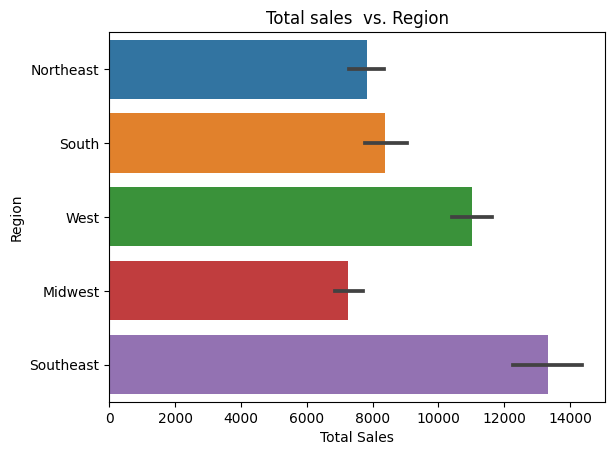

In [58]:
# using sequencial color for totsl sale vs region scheme
sns.barplot(x='Total Sales', y='Region',  data=df)
plt.title('Total sales  vs. Region')

The state with high performances of sales on the good months



Month,January,June,July,August,November,December
State,,,,,,
Florida,9913.08,19630.01,23682.40,18255.12,13532.72,19283.17
Georgia,11172.59,9722.74,10349.36,10840.76,9600.36,11116.97
Kentucky,7708.07,6321.89,8687.33,8449.57,7165.92,9678.90
North Carolina,9905.43,20939.47,25659.55,23106.57,19142.64,25977.13
South Carolina,12523.30,24559.43,28832.24,26033.21,23072.61,29351.85
Virginia,6454.85,16815.92,20864.95,15033.01,10503.43,15694.38


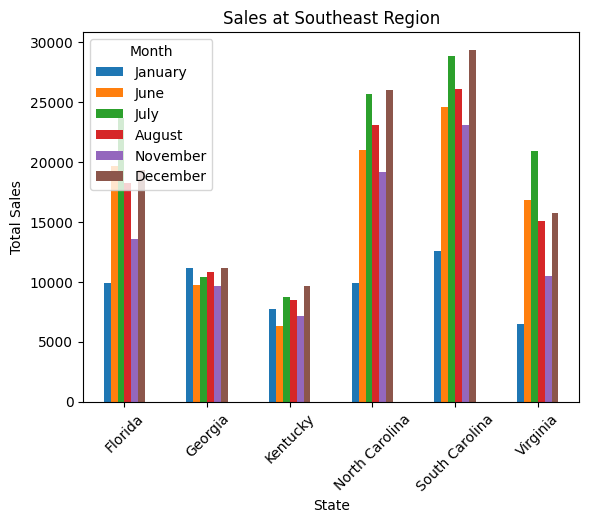

In [59]:
states = df.pivot_table(values='Total Sales', index=['Region','State'], columns='Month', fill_value=0)
region = 'Southeast'

months = ['January','June', 'July', 'August', 'November', 'December']

Southeast_data = states.loc[region, months].round(2)
Southeast_data.plot.bar()
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales at Southeast Region')
plt.xticks(rotation=45)
Southeast_data

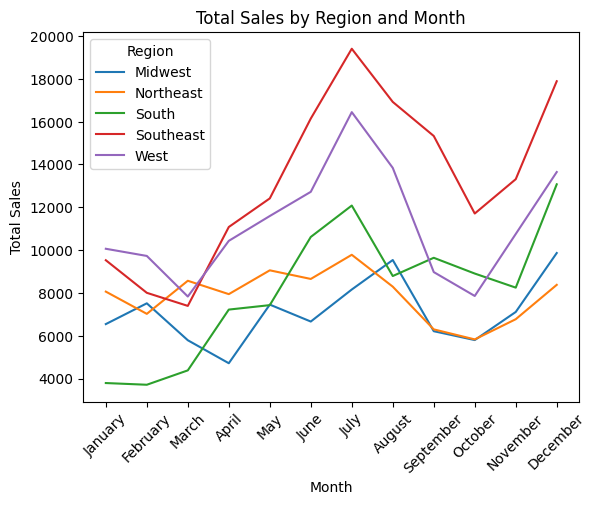

In [60]:
#trends troughout the year per region sales

region_sales = df.pivot_table(values='Total Sales', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
region_sales = region_sales.reindex(month_order)

# Plotting the pivot table
region_sales.plot.line()
plt.xticks(range(len(region_sales.index)), region_sales.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

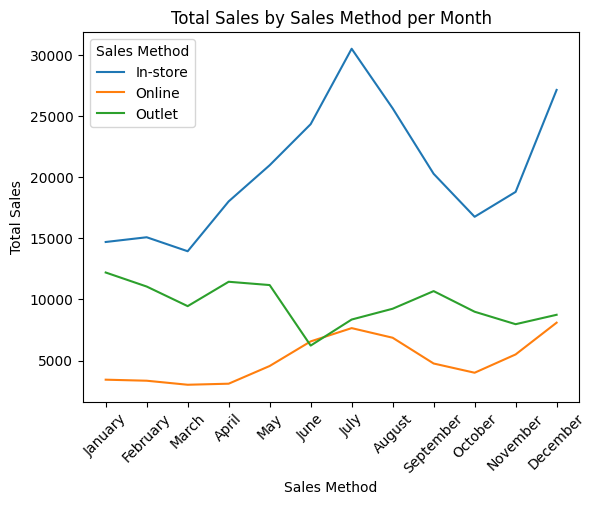

In [61]:
#Sales method trends throughout the year
region_sales = df.pivot_table(values='Total Sales', index='Month', columns='Sales Method', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
region_sales = region_sales.reindex(month_order)

# Plotting the pivot table
region_sales.plot.line()
plt.xticks(range(len(region_sales.index)), region_sales.index)

# Adding labels and title
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sales Method per Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()



#Ceating a Model This is formatted as code for machine Learning



In [62]:
#Putting feature variable to x

x = df[['Units Sold','Operating Profit','Price per Unit']]

#Putting  Total sale variable to y

y = df['Total Sales']

In [63]:
x = pd.DataFrame(pre_process.fit_transform(x))

x.head()

,0,1,2
0,4.403905,4.901821,0.325350
1,3.470040,2.133366,0.325350
2,3.470040,1.948802,-0.354677
3,2.769641,1.835757,-0.014664
4,3.003108,2.354842,1.005377


In [64]:
y.head()

0    60000.0
1    50000.0
2    40000.0
3    38250.0
4    54000.0
Name: Total Sales, dtype: float64

train test and split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

scaling

In [67]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

LinearRegregression Model

In [68]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

In [69]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [70]:
for f,c in zip(x_train, linear_coef):
  print("coef of column", f, "is : ", c)

coef of column 0 is :  4828.4762556591995
coef of column 1 is :  8767.071740601516
coef of column 2 is :  1497.4478537385987


Predicting

In [71]:
y_pred = reg.predict(scaled_x_test)

In [72]:
linear_score = metrics.r2_score(y_test, y_pred)

Matrics

In [74]:
def Evaluation(x_test, y_test, model) :
  y_pred = model.predict(x_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print("mean_absolute_error : ", mse)
  print("mean_squared_error : ", msqe)
  print("root_mean_absolute_error : ", rmse)
  print("r2_score    : ", r2_score)


In [75]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  2256.7454821903584
mean_squared_error :  11509778.00959544
root_mean_absolute_error :  3392.6063741016937
r2_score    :  0.9405843505849459


In [76]:
def compare(y_test, y_pred) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = y_pred
  compare["compare"] = abs(y_test - y_pred)

  return compare

Text(0, 0.5, 'y_pred')

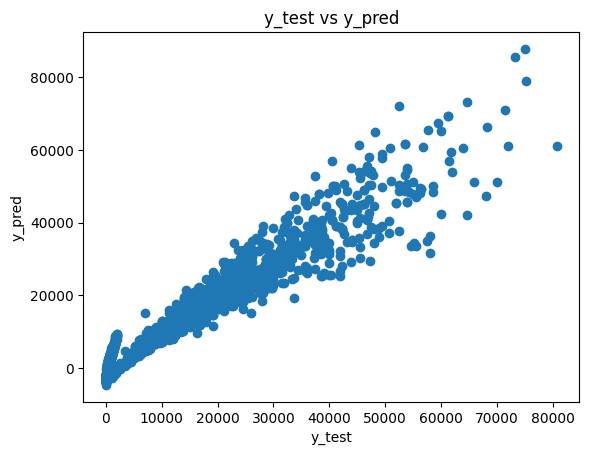

In [77]:
plt.scatter(y_test, y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

**Visualization**
> Let's visualize the prediction distributions, the orange color discribes  the actual values and the blue discribes the prediction values.

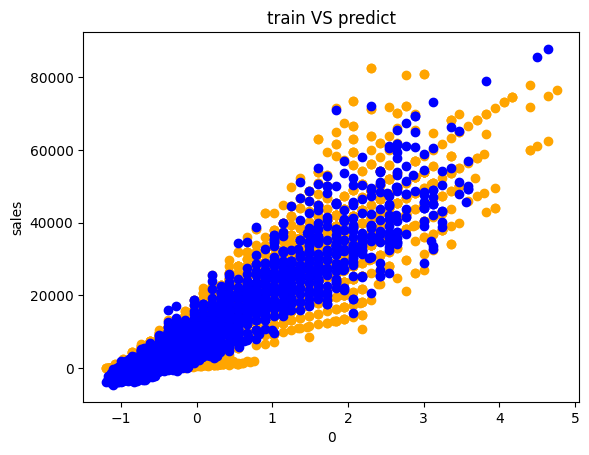

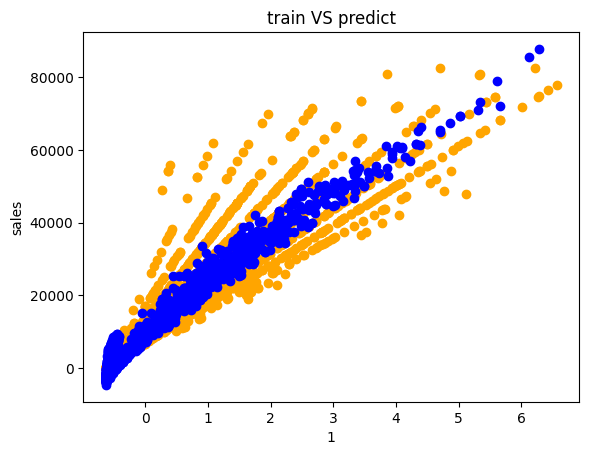

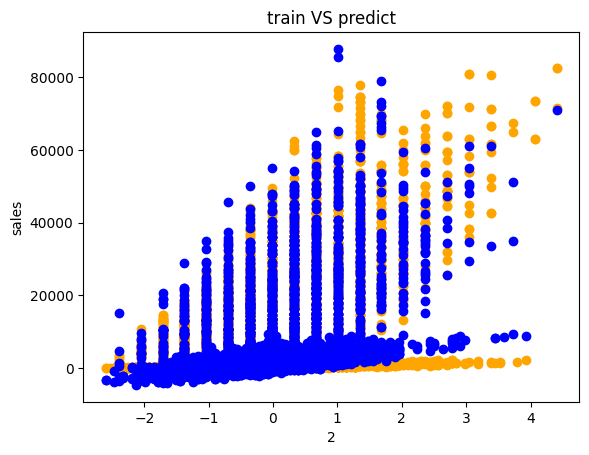

In [78]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="Orange")
    plt.scatter(x_test[i], y_pred, color="blue")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"sales")
    plt.show()

In [79]:
compare(y_test, y_pred)

,Actual,Predict,compare
8134,201.6,-1932.317185,2133.917185
6090,602.7,1659.079404,1056.379404
9487,390.0,499.266678,109.266678
4945,132.6,-2065.317659,2197.917659
5477,473.2,1157.615858,684.415858
...,...,...,...
919,24000.0,18167.177571,5832.822429
4849,767.6,2681.050043,1913.450043
6272,456.3,454.378577,1.921423
1338,21125.0,15841.060023,5283.939977


**Thanks for the time spended reading my notebook**

---

